### Importação dos dados



In [1]:
#Importando Dados
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
#Analizando faturamento
vendas_por_loja = pd.DataFrame({
    'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Vendas': [
        loja["Preço"].sum(),
        loja2["Preço"].sum(),
        loja3["Preço"].sum(),
        loja4["Preço"].sum()
    ]
})
# Formatando os valores com separador de milhar e vírgula como separador decimal
vendas_formatadas_br = vendas_por_loja.copy()
vendas_formatadas_br['Vendas'] = vendas_formatadas_br['Vendas'].apply(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

In [3]:
#Mostrando Vendas total por lojas:
print("\nVendas totais por loja (ordenadas de forma decrescente):\n")
vendas_formatadas_br.sort_values(by='Vendas', ascending=False)


Vendas totais por loja (ordenadas de forma decrescente):



,Lojas,Vendas
0,Loja 1,"1.534.509,12"
1,Loja 2,"1.488.459,06"
2,Loja 3,"1.464.025,03"
3,Loja 4,"1.384.497,58"


# 2. Vendas por Categoria


In [4]:
# Agrupando as vendas por categoria de produto em cada loja
categoria_loja1 = loja.groupby('Categoria do Produto')['Preço'].sum()
categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

# Juntando os dados em um único DataFrame
vendas_categoria = pd.DataFrame({
    'Loja 1': categoria_loja1,
    'Loja 2': categoria_loja2,
    'Loja 3': categoria_loja3,
    'Loja 4': categoria_loja4
})

# Substituindo NaNs por 0
vendas_categoria.fillna(0, inplace=True)

# Somando as vendas totais por categoria
vendas_categoria['Total'] = vendas_categoria.sum(axis=1)


In [17]:
# vendas por categoria de produto em cada loja

print("\nVendas por categoria de produto em cada loja:\n")
vendas_categoria.sort_values(by='Total', ascending=False)



Vendas por categoria de produto em cada loja:



,Loja 1,Loja 2,Loja 3,Loja 4,Total
Categoria do Produto,,,,,
brinquedos,23993.78,21262.21,25869.20,27015.67,"98.140,86"
utilidades domesticas,16931.48,19662.86,20080.21,20098.83,"76.773,38"
livros,11713.92,13454.35,12664.70,12427.77,"50.260,74"
instrumentos musicais,121731.69,139987.03,103174.45,100136.50,"465.029,67"
eletronicos,572659.23,547773.71,547699.92,545966.86,"2.214.099,72"
esporte e lazer,52387.55,46326.09,47456.10,44465.65,"190.635,39"
eletrodomesticos,484913.36,464758.13,438984.89,377680.65,"1.766.337,03"
moveis,250178.11,235234.68,268095.56,256705.65,"1.010.214,00"


# 3. Média de Avaliação das Lojas

In [6]:
# Calcular Avaliacao Média das lojas
media_avaliacao_por_loja = pd.DataFrame({
    'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Media Avalc. Compra': [
        loja["Avaliação da compra"].mean(),
        loja2["Avaliação da compra"].mean(),
        loja3["Avaliação da compra"].mean(),
        loja4["Avaliação da compra"].mean()
    ]
})
print("\n⭐ Avaliação média por loja (de 1 a 5):\n")
media_avaliacao_por_loja.sort_values(by='Media Avalc. Compra', ascending=False).round(2)


⭐ Avaliação média por loja (de 1 a 5):



,Lojas,Media Avalc. Compra
2,Loja 3,4.05
1,Loja 2,4.04
3,Loja 4,4.00
0,Loja 1,3.98


# 4. Produtos Mais e Menos Vendidos

In [7]:
# "x" Produtos mais vendidos

x = 3

mais_vendido_loja1 = loja['Produto'].value_counts().head(x).reset_index()
mais_vendido_loja1.columns = ['Produto', 'Qtd']
mais_vendido_loja2 = loja2['Produto'].value_counts().head(x).reset_index()
mais_vendido_loja2.columns = ['Produto', 'Qtd']
mais_vendido_loja3 = loja3['Produto'].value_counts().head(x).reset_index()
mais_vendido_loja3.columns = ['Produto', 'Qtd']
mais_vendido_loja4 = loja4['Produto'].value_counts().head(x).reset_index()
mais_vendido_loja4.columns = ['Produto', 'Qtd']


# Asignar MultiIndex a las columnas para cada loja
mais_vendido_loja1.columns = pd.MultiIndex.from_product([['Loja 1'], mais_vendido_loja1.columns])
mais_vendido_loja2.columns = pd.MultiIndex.from_product([['Loja 2'], mais_vendido_loja2.columns])
mais_vendido_loja3.columns = pd.MultiIndex.from_product([['Loja 3'], mais_vendido_loja3.columns])
mais_vendido_loja4.columns = pd.MultiIndex.from_product([['Loja 4'], mais_vendido_loja4.columns])

# Concatenar lado a lado
mais_vendidos_juntas = pd.concat([mais_vendido_loja1, mais_vendido_loja2, mais_vendido_loja3, mais_vendido_loja4], axis=1)
print(f"\n🔝 {x} Produtos Mais Vendidos por Loja:\n")
display(mais_vendidos_juntas)


🔝 3 Produtos Mais Vendidos por Loja:



Loja 1                        Loja 2              Loja 3      \
         Produto Qtd                   Produto Qtd         Produto Qtd   
0    Micro-ondas  60  Iniciando em programação  65   Kit banquetas  57   
1  TV Led UHD 4K  60               Micro-ondas  62  Mesa de jantar  56   
2  Guarda roupas  60                   Bateria  61       Cama king  56   

                    Loja 4      
                   Produto Qtd  
0                 Cama box  62  
1                 Faqueiro  59  
2  Dashboards com Power BI  56

In [8]:
# "x" Produtos menos vendidos

menos_vendido_loja1 = loja['Produto'].value_counts().tail(x).reset_index()
menos_vendido_loja1.columns = ['Produto', 'Qtd']
menos_vendido_loja2 = loja2['Produto'].value_counts().tail(x).reset_index()
menos_vendido_loja2.columns = ['Produto', 'Qtd']
menos_vendido_loja3 = loja3['Produto'].value_counts().tail(x).reset_index()
menos_vendido_loja3.columns = ['Produto', 'Qtd']
menos_vendido_loja4 = loja4['Produto'].value_counts().tail(x).reset_index()
menos_vendido_loja4.columns = ['Produto', 'Qtd']

# Asignar MultiIndex a las columnas para cada loja
menos_vendido_loja1.columns = pd.MultiIndex.from_product([['Loja 1'], menos_vendido_loja1.columns])
menos_vendido_loja2.columns = pd.MultiIndex.from_product([['Loja 2'], menos_vendido_loja2.columns])
menos_vendido_loja3.columns = pd.MultiIndex.from_product([['Loja 3'], menos_vendido_loja3.columns])
menos_vendido_loja4.columns = pd.MultiIndex.from_product([['Loja 4'], menos_vendido_loja4.columns])

# Concatenar lado a lado
menos_vendidos_juntas = pd.concat([menos_vendido_loja1, menos_vendido_loja2, menos_vendido_loja3, menos_vendido_loja4], axis=1)
print(f"\n🔻 {x} Produtos Menos Vendidos por Loja:\n")
display(menos_vendidos_juntas)


🔻 3 Produtos Menos Vendidos por Loja:



Loja 1                 Loja 2                Loja 3      \
             Produto Qtd            Produto Qtd           Produto Qtd   
0  Panela de pressão  35     Mesa de jantar  34           Mochila  36   
1            Headset  33         Impressora  34       Micro-ondas  36   
2       Celular ABXY  33  Jogo de tabuleiro  32  Blocos de montar  35   

          Loja 4      
         Produto Qtd  
0         Violão  37  
1  Guarda roupas  34  
2       Guitarra  33

# 5. Frete Médio por Loja


In [9]:
#Calcular o custo médio de frete para cada loja
frete_m_por_loja = pd.DataFrame({
    'Lojas': ['Loja 1','Loja 2','Loja 3','Loja 4'],
    'Media do Frete': [
        loja["Frete"].mean(),
        loja2["Frete"].mean(),
        loja3["Frete"].mean(),
        loja4["Frete"].mean()
    ]
})

#Importando local para a fomatacao
import locale
# Configurando o locale para o formato brasileiro
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')


# Formatando a coluna 'Media do Frete' com a localidade
frete_m_por_loja['Media do Frete'] = frete_m_por_loja['Media do Frete'].apply(lambda x: locale.currency(x, grouping=True))


print("\nMedia do Valor do Frete por Loja:\n")
frete_m_por_loja.sort_values(by='Media do Frete', ascending=False).round(2)


Media do Valor do Frete por Loja:



,Lojas,Media do Frete
0,Loja 1,"R$ 34,69"
1,Loja 2,"R$ 33,62"
2,Loja 3,"R$ 33,07"
3,Loja 4,"R$ 31,28"


# Analisis com gráficos

In [10]:
#Importantdo pyplot da libraria matplotlib como plt
import matplotlib.pyplot as plt

# Função para formatar os rótulos
def formatar_valor(pct, total):
    valor_absoluto = int(pct / 100. * total)
    return f'R$ {locale.format_string("%d", valor_absoluto, grouping=True)} \n({pct:.1f}%)'

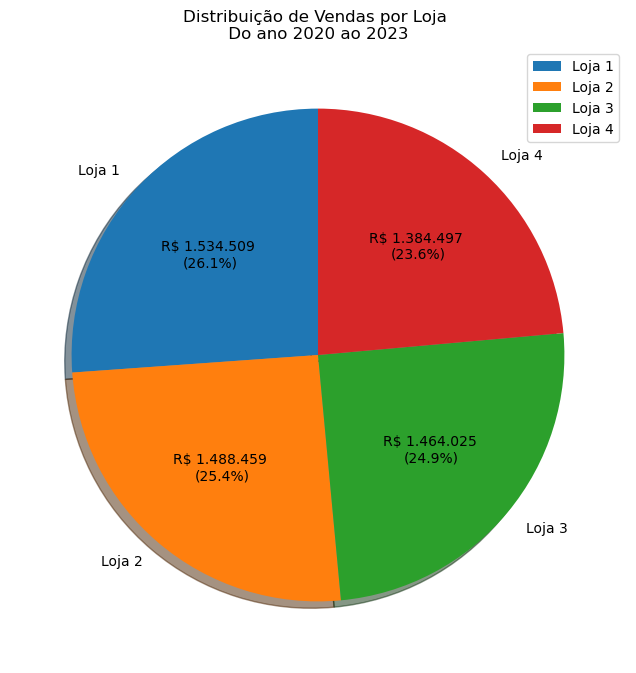

In [13]:
#Mostrando as vendas por loja em grafico de pizza
loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], dayfirst=True)
anos = list(set(loja['Data da Compra'].dt.year))

plt.figure(figsize=(10, 8))
plt.pie(vendas_por_loja['Vendas'], labels=vendas_por_loja['Lojas'], autopct=lambda p: formatar_valor(p, vendas_por_loja['Vendas'].sum()), startangle=90,shadow=True)
plt.title(f'Distribuição de Vendas por Loja \n Do ano {anos[0]} ao {anos[-1]} ')
plt.legend(vendas_por_loja['Lojas'], loc='upper right')
plt.show()